# Overview:
In this assignment, we continue to analyze discrete Fourier transforms for non-periodic functions. When doing so, we face the problem Gibb's phenomenon as we have some discontinuities in the functions. To overcome this, we introduce windowing using the Hamming window. With the help of this, we also perform a time-frequency analysis for the chirped signal.

# Code and Generated Outputs :
Importing required libraries :

In [1]:
# %matplotlib qt
from pylab import *
import mpl_toolkits.mplot3d.axes3d as p3 
# for plotting surface plot of chirped function

The generic utility function to plot and return the transform of a given function $func$ with or without windowing. This function is the same as used in the last assignment except the part where we define $y[0] = 0$ as we are dealing with non-periodic functions with possible discontinuities here. 

In [2]:
def transform(func = sin, T = 8*pi, N = 512, lim = 5, hamming = False, ret = False, c = 1):
    t=linspace(-T/2,T/2,N+1);t=t[:-1]
    y=func(t)
    y[0]= 0 
    w=linspace(-N*(pi/T),N*(pi/T),N+1);w=w[:-1]
    n = arange(N)
    W = fftshift(0.54+0.46*cos(2*pi*n/(N-1))) 
    if(hamming):
        y = y*W
    Y=fftshift(fft(fftshift(y)))/N
    figure()
    subplot(2,1,1)
    plot(w,abs(Y),lw=2)
    xlim([-lim,lim])
    ylabel(r"$|Y|$",size=16)
    grid(True)
    subplot(2,1,2)
    ii = where(abs(Y) > 1e-3)
    plot(w,angle(Y),'go',markersize= 3)
    xlim([-lim,lim])
    ylabel(r"Phase of $Y$",size=16)
    xlabel(r"$\omega$",size=16)
    grid(True)
    show()
    if(ret):
        return Y

## Analyzing transform of $cos^{3}(w_{0}t)$
First we plot the transform without windowing. We get 4 peaks, but they are not separated and are broad.

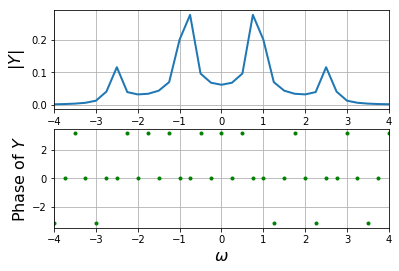

In [3]:
transform(func = lambda x : cos(0.86*x)**3, T = 8*pi, N = 256, lim = 4)

Now, we plot with windowing and see that the peaks are now narrorwer and more separated than before.

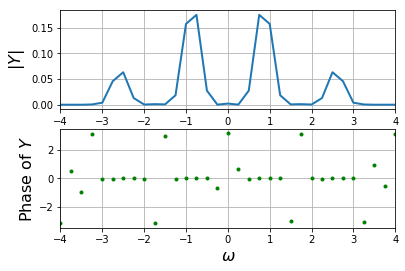

In [4]:
transform(func = lambda x : cos(0.86*x)**3, T = 8*pi, N = 256, lim = 4, hamming = 1)

## Finding phase and frequency of given cosine from transform
We first find the transform of the given cosine (taking $w_{0}=1.5$ and $\delta=0.5$) and find its frequency by taking the weighted average of $\omega$ with $\mid{Y}\mid^{2}$. In case of $\delta$, we know that the phase at the peaks give us directly the phase shift which is $\delta$ in our case, we take its value directly.

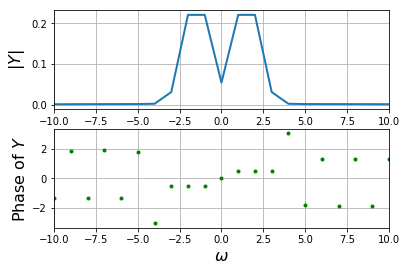

w0 :
1.4946936152446477
delta :
0.4917448315931694


In [5]:
Y = transform(func = lambda x : cos(1.5*x+0.5), T = 2*pi, N = 128, lim = 10, ret = 1, hamming=1)
w = linspace(-64,64,129);w=w[:-1]
weighted_sum = 0
sum_y2 = 0
for i in range(128):
    #print(Y[i],w[i])
    weighted_sum = weighted_sum + (abs(Y[i]**2)*abs(w[i]))
    sum_y2 = sum_y2 + (abs(Y[i]**2))
print('w0 :')
print(weighted_sum/sum_y2)
print('delta :')
print(angle(Y[65]))

We see that the obtained values of $\omega_{0}$ and $\delta$ are very close to the given values. Next, we do the same along with adding some noise to the previous function and try to find the same using the same methods above.

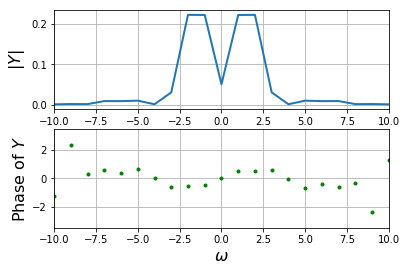

w0 :
2.409680825681503
delta :
0.496199540632489


In [6]:
Y = transform(func = lambda x : cos(1.5*x+0.5)+0.1*randn(128), T = 2*pi, N = 128, lim = 10, ret = 1, hamming=1)
w = linspace(-64,64,129);w=w[:-1]
weighted_sum = 0
sum_y2 = 0
for i in range(128):
    #print(Y[i],w[i])
    weighted_sum = weighted_sum + (abs(Y[i]**2)*abs(w[i]))
    sum_y2 = sum_y2 + (abs(Y[i]**2))
print('w0 :')
print(weighted_sum/sum_y2)
print('delta :')
print(angle(Y[65]))

We see that the $\delta$ is close to required value but the frequency is far different from the required value, due to noise added.

## The chirped function
We first plot the transform of the given function, with hamming windowing.

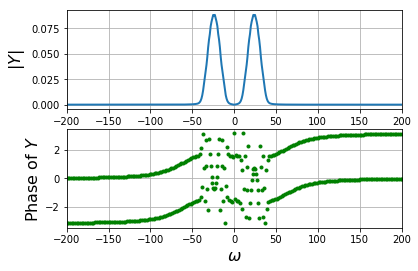

In [7]:
transform(func = lambda x : cos(16*(1.5+x/(2*pi))*x), T = 2*pi, N = 1024, lim = 200, hamming=1)

Next, we take fragments of the samples, each of length 64, take transform of each fragment, and then plot it along with the frequency as a surface plot.We see that as time increases from $-\pi$ to $+\pi$, the frequency where the peak occurs, keeps changing from $16 rad/sec$ and $32 rad/sec$.

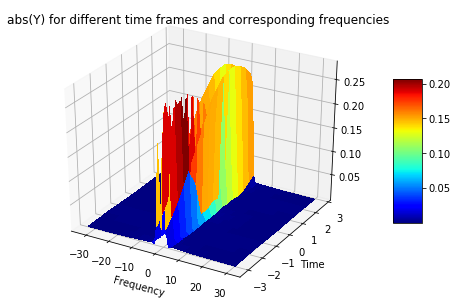

In [8]:
Ts = linspace(-pi,pi,17)
n = arange(64)
W = fftshift(0.54+0.46*cos(2*pi*n/63)) 
M = []
for i in range(16):
    t = linspace(Ts[i],Ts[i+1],65); t=t[:-1]
    y = (cos(16*(1.5+t/(2*pi))*t))*W
    y[0] = 0
    Y=fftshift(fft(y))/64
    M.append(abs(Y))
Ts = Ts[:-1]
wax = linspace(-32,32,65); wax = wax[:-1]
M = array(M).T
T,W = meshgrid(Ts,wax)

fig1=figure(4) # open a new figure
ax=p3.Axes3D(fig1) # Axes3D is the means to do a surface plot
title('abs(Y) for different time frames and corresponding frequencies')
surf = ax.plot_surface(W, T, M, linewidth=0, antialiased=False, cmap=cm.jet)
fig1.colorbar(surf, shrink=0.5, aspect=5)
ax.set_aspect('auto')
ylabel("Time")
xlabel("Frequency")
show()

# Conclusion
- The $cos^{3}(\omega t)$ function's transform was observed to be better with windowding.
- We found the frequency and phase of a given cosine using its transform and the obtained values were close enough when the noise was not there and noise abruptly changed the frequency's value.
- We also observed the chirped function and saw that its frequency kept changing with time, by analyzing its fragments separately.